In [14]:
import common
import fitCurves
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from math import inf
import matplotlib.patches as patches
import glob
import rdp
#time, pos = common.import_csv_data('w_data.csv')
#pos[1]=-pos[1]
#paths=[pos]
paths = []
for csv_path in glob.glob('outs/*.csv'):
    _, p = common.import_csv_data(csv_path)
    paths.append(p)

In [50]:
def fit_bezier_to_points(points):
    filtered_points = rdp.rdp(np.stack((points[0], points[1]), axis=1))
    control_points = fitCurves.fitCurve(filtered_points, 1e0)
    return [(s[0],s[1]) for s in np.concatenate(control_points)]

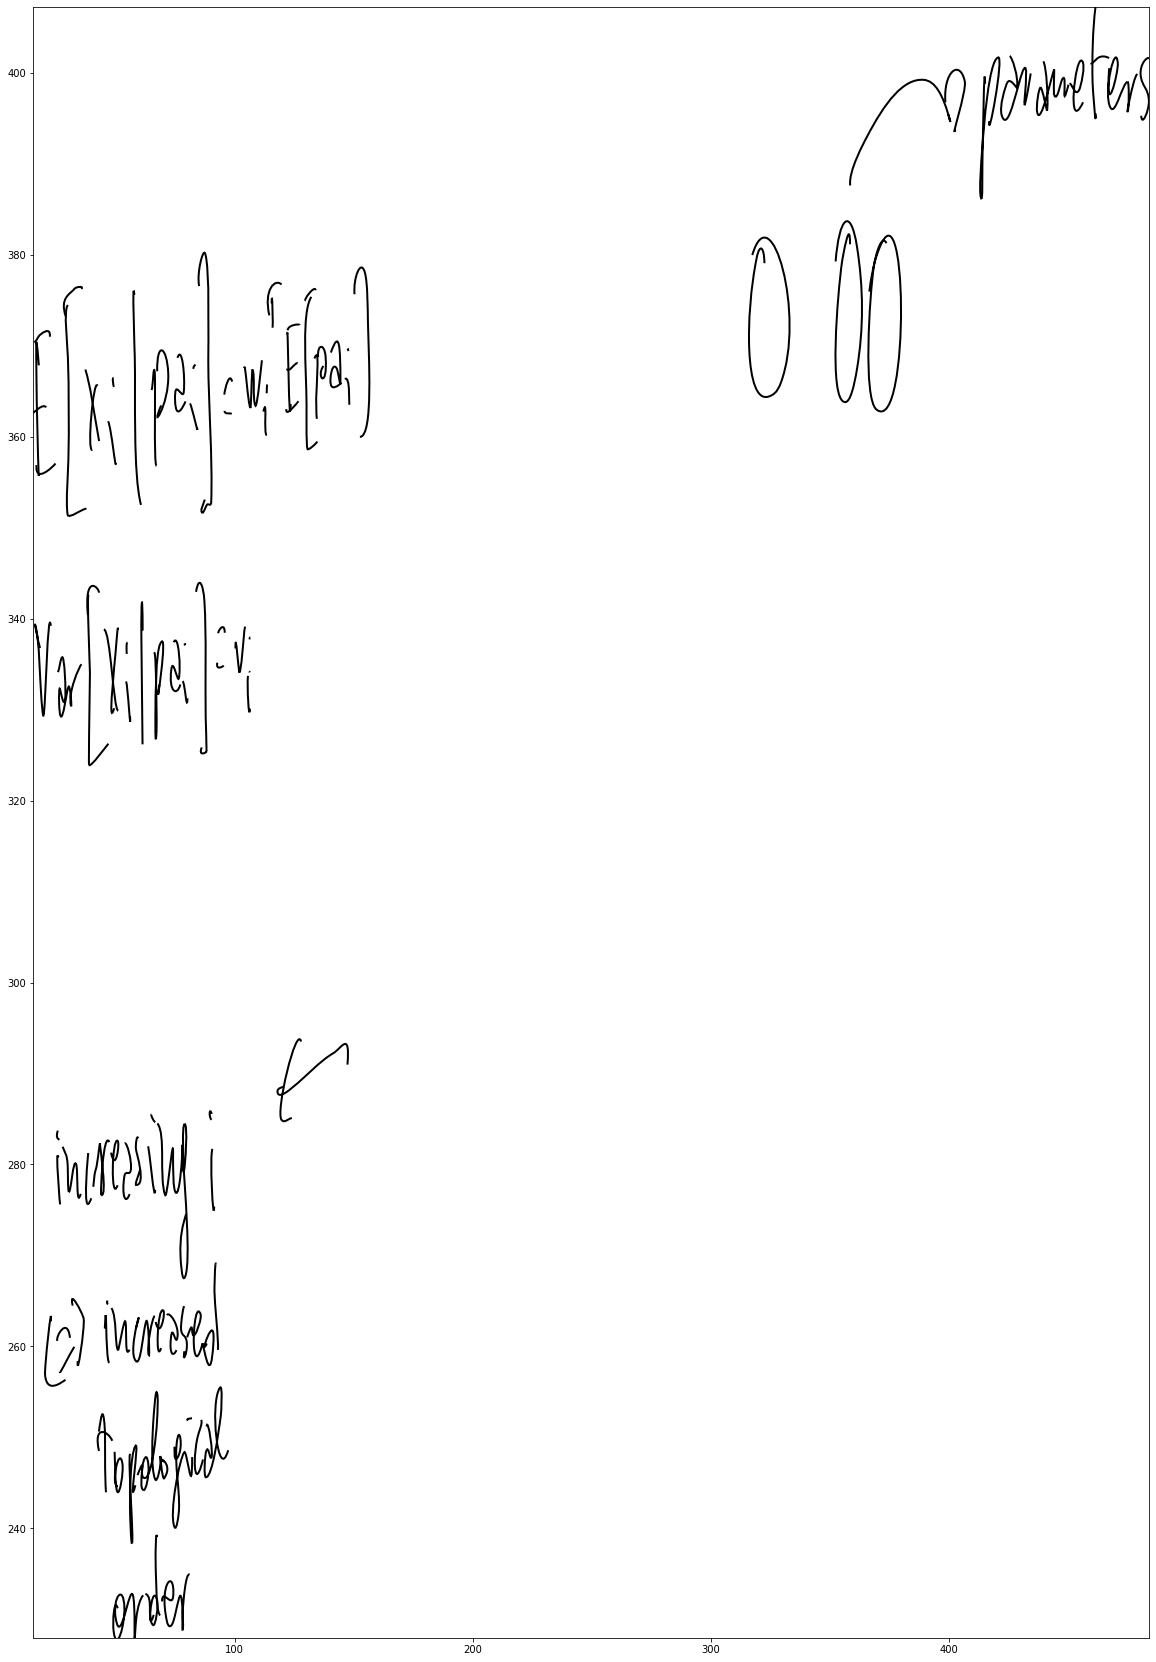

In [51]:
def generate_bezier_patch(control_points):
    codes = [
        Path.MOVETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
    ] * (len(control_points)//4)

    path = Path(control_points, codes)
    return patches.PathPatch(path, facecolor='none', lw=2)


fig, ax = plt.subplots(figsize=(20, 30))
min_x = min_y = inf
max_x = max_y = -inf
for points in paths:
    control_points = fit_bezier_to_points(points)
    patch = generate_bezier_patch(control_points)
    ax.add_patch(patch)
    min_x = min(min_x, min(points[0]))
    min_y = min(min_y, min(points[1]))
    max_x = max(max_x, max(points[0]))
    max_y = max(max_y, max(points[1]))
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
plt.show()